<br/>

## Tarea 6 - Evaluación de los modelos parte I
### Alumno - Sebastián Ituarte
<span style="color:green"><b>Minería de datos empresariales</b></span>

---

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree

## Actividad 1

In [2]:
# Importamos datos necesarios a DataFrame
df = pd.read_excel("Concrete_Data.xls")

In [3]:
# Imprimimos características
print("Características del Dataframe")
num_filas, num_columnas = df.shape
print(df.shape)

# Cantidad de registros filas
print("Cantidad de filas")
print(num_filas)

# Cantidad de características columnas
print("Cantidad de columnas")
print(num_columnas)

# Imprimimos los nombres de las columnas
print("\n")
print("Nombre de sus columnas")
print(df.columns)

Características del Dataframe
(1030, 9)
Cantidad de filas
1030
Cantidad de columnas
9


Nombre de sus columnas
Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


#### Minimizamos los nombres de las columnas para un mejor análisis y comprensión en el trabajo futuro del Dataframe

In [4]:
# Minimizamos los nombres de las columnas para un mejor análisis y comprensión en el trabajo futuro del Dataframe
df.columns = [
    "Cement",
    "Slag",
    "Fly_Ash",
    "Water",
    "Superplasticizer",
    "Coarse_Aggregate",
    "Fine_Aggregate",
    "Age",
    "Strength",
]

# Imprimimos nuevos nombres de columnas
print("\n")
print("Nombre de sus columnas")
print(df.columns)



Nombre de sus columnas
Index(['Cement', 'Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Strength'],
      dtype='object')


In [5]:
# Visualizar las primeras filas del dataset
df.head()

,Cement,Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [6]:
# Obtener un resumen estadístico de los datos
df.describe()

,Cement,Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [7]:
# Estudiamos el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Slag              1030 non-null   float64
 2   Fly_Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   Coarse_Aggregate  1030 non-null   float64
 6   Fine_Aggregate    1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   Strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
# Registrar si hay duplicados
duplicated_rows = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicated_rows}")

Cantidad de filas duplicadas: 25


In [9]:
# Identificar filas duplicadas
duplicated_rows = df[df.duplicated(keep=False)]

# Mostrar las filas duplicadas
duplicated_rows

,Cement,Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
72,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
83,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
95,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007


In [10]:
df.count()

,0
Cement,1030
Slag,1030
Fly_Ash,1030
Water,1030
Superplasticizer,1030
Coarse_Aggregate,1030
Fine_Aggregate,1030
Age,1030
Strength,1030


In [11]:
# Eliminación de duplicados
df.drop_duplicates(inplace=True)

In [12]:
df.count()

,0
Cement,1005
Slag,1005
Fly_Ash,1005
Water,1005
Superplasticizer,1005
Coarse_Aggregate,1005
Fine_Aggregate,1005
Age,1005
Strength,1005


In [13]:
# Chequear si hay datos repetidos
duplicated_rows = df[df.duplicated()]

# Mostrar las filas duplicadas, si existen
if not duplicated_rows.empty:
    print("Filas duplicadas encontradas:")
    print(duplicated_rows)
else:
    print("No se encontraron filas duplicadas.")

No se encontraron filas duplicadas.


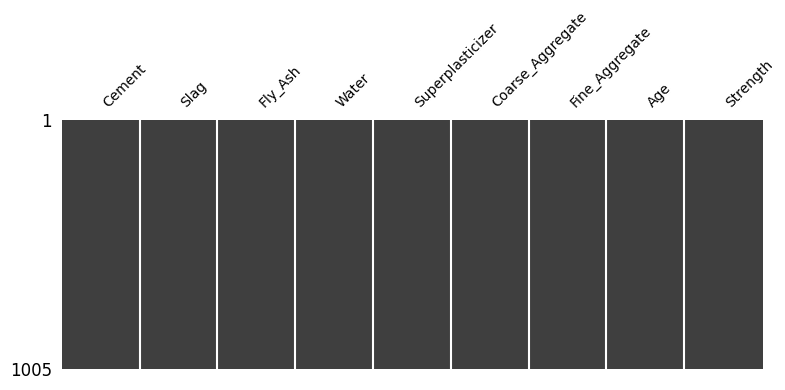

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))

msno.matrix(df, ax=ax, sparkline=False, fontsize=10)
plt.tight_layout()
plt.show();

In [15]:
# Mostrar si hay valores ausentes
missing_values = df.isnull().sum()
print(f"Valores ausentes por atributo:\n{missing_values}")

Valores ausentes por atributo:
Cement              0
Slag                0
Fly_Ash             0
Water               0
Superplasticizer    0
Coarse_Aggregate    0
Fine_Aggregate      0
Age                 0
Strength            0
dtype: int64


In [16]:
df.isnull().sum().sum()

0

In [17]:
# Obtener un resumen estadístico de los datos
df.describe()

,Cement,Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [18]:
# Función para detectar outliers usando IQR
def detect_outliers(df, column):
    if df[column].dtype in ["int64", "float64"]:
        Q1 = np.quantile(df[column], 0.25)
        Q3 = np.quantile(df[column], 0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

In [19]:
# Mostrar la cantidad de outliers para cada columna
for column in df.columns:
    outliers_count = detect_outliers(df, column)
    print(f"{column}: {outliers_count} outliers")

Cement: 0 outliers
Slag: 2 outliers
Fly_Ash: 0 outliers
Water: 15 outliers
Superplasticizer: 10 outliers
Coarse_Aggregate: 0 outliers
Fine_Aggregate: 5 outliers
Age: 59 outliers
Strength: 8 outliers


### Datos estadísticos de las variables

In [20]:
def estadistica(data, var):
    q1 = np.percentile(data[var], 25)
    q3 = np.percentile(data[var], 75)
    iqr = q3 - q1

    data_estadistica = {
        "media": np.mean(data[var]),
        "desviacion_std": np.std(data[var], ddof=1),
        "mediana": np.median(data[var]),
        "varianza": np.var(data[var], ddof=1),
        "q1": q1,
        "q3": q3,
        "iqr": iqr,
    }

    print(f"Datos estadisticos para variable - {var}")
    print(data_estadistica)


# Analizamos las variables previo a crear los gráficos
for variable in df.columns:
    estadistica(df, variable)
    print("\n")

Datos estadisticos para variable - Cement
{'media': 278.62905472636817, 'desviacion_std': 104.34500276101967, 'mediana': 265.0, 'varianza': 10887.879601197203, 'q1': 190.68, 'q3': 349.0, 'iqr': 158.32}


Datos estadisticos para variable - Slag
{'media': 72.04313432835822, 'desviacion_std': 86.17055515848543, 'mediana': 20.0, 'varianza': 7425.364576321579, 'q1': 0.0, 'q3': 142.5, 'iqr': 142.5}


Datos estadisticos para variable - Fly_Ash
{'media': 55.53507462686567, 'desviacion_std': 64.20744844933418, 'mediana': 0.0, 'varianza': 4122.596436373907, 'q1': 0.0, 'q3': 118.27, 'iqr': 118.27}


Datos estadisticos para variable - Water
{'media': 182.07437810945274, 'desviacion_std': 21.34073965588068, 'mediana': 185.7, 'varianza': 455.42716906007814, 'q1': 166.61, 'q3': 192.94, 'iqr': 26.329999999999984}


Datos estadisticos para variable - Superplasticizer
{'media': 6.031646766169154, 'desviacion_std': 5.91955899580221, 'mediana': 6.1, 'varianza': 35.041178704782865, 'q1': 0.0, 'q3': 10.0, '

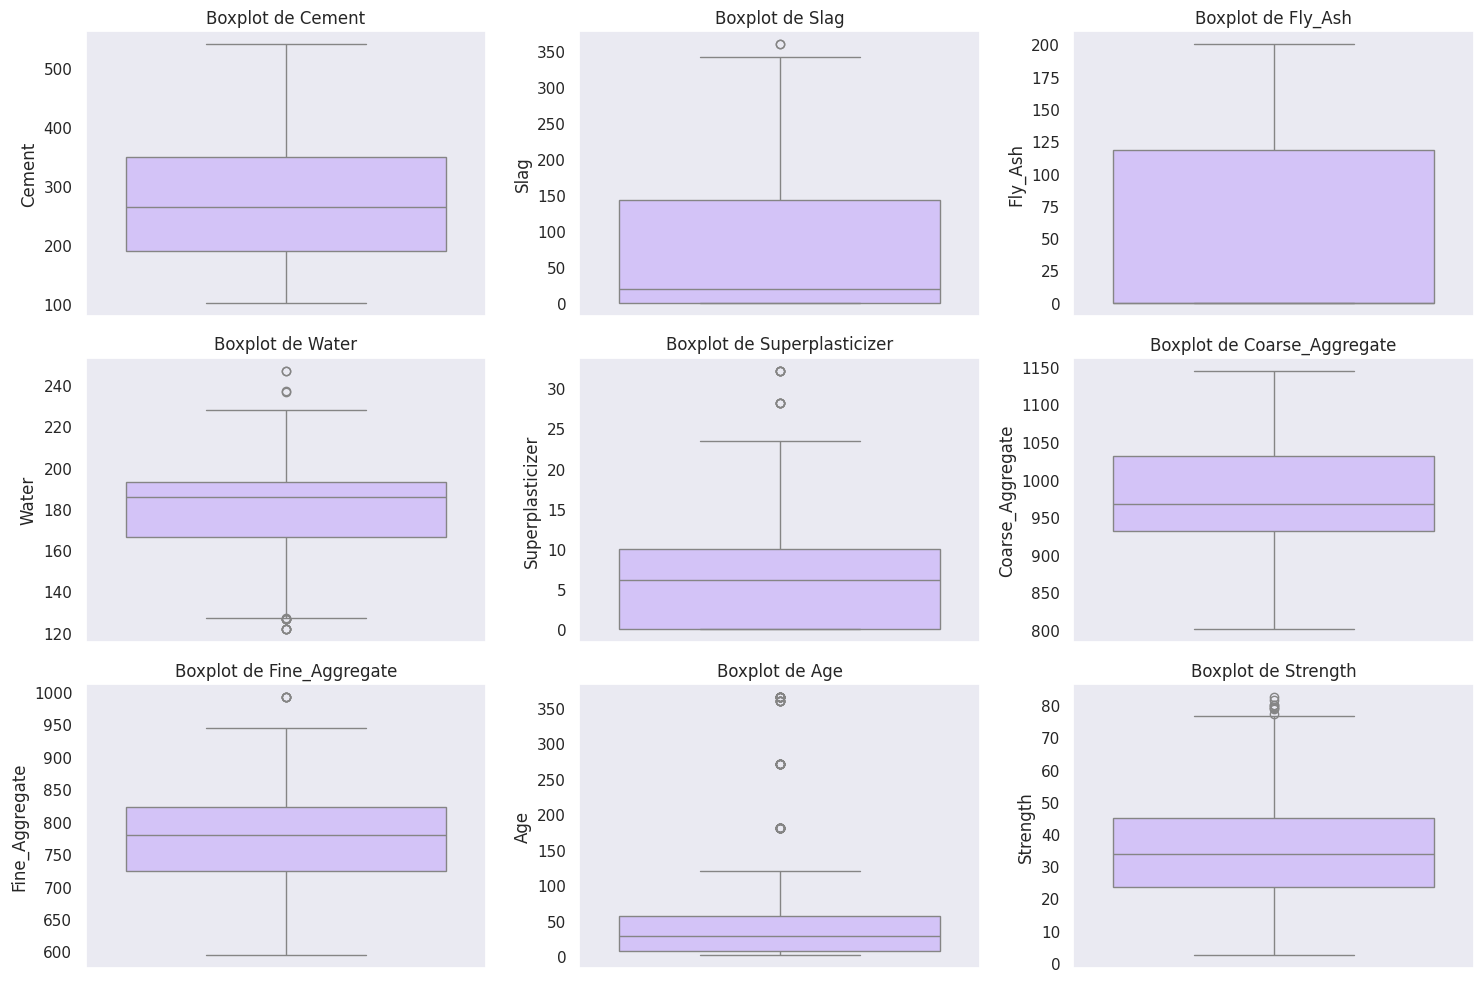

In [22]:
# Crear los boxplots
sns.set_theme(style="dark", palette="pastel")
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column, color="m")
    plt.title(f"Boxplot de {column}")
plt.tight_layout()
plt.show()

### Análisis de Resultados - Boxplots

#### Cement
- **Mediana:** Aproximadamente 300 kg/m³.
- **Rango Intercuartil:** Desde aproximadamente 200 kg/m³ hasta 400 kg/m³.
- **Observaciones:** No se observan valores atípicos.

#### Slag
- **Mediana:** Aproximadamente 75 kg/m³.
- **Rango Intercuartil:** Desde 0 hasta aproximadamente 150 kg/m³.
- **Observaciones:** Se observan algunos valores atípicos por encima de 150 kg/m³.

#### Fly_Ash
- **Mediana:** Alrededor de 0 kg/m³.
- **Rango Intercuartil:** Desde 0 hasta aproximadamente 100 kg/m³.
- **Observaciones:** No se observan valores atípicos.

#### Water
- **Mediana:** Aproximadamente 190 kg/m³.
- **Rango Intercuartil:** Desde 160 kg/m³ hasta 210 kg/m³.
- **Observaciones:** Se observan valores atípicos tanto en el extremo inferior como superior.

#### Superplasticizer
- **Mediana:** Alrededor de 0 kg/m³.
- **Rango Intercuartil:** Desde 0 hasta aproximadamente 5 kg/m³.
- **Observaciones:** Algunos valores atípicos se observan por encima de 10 kg/m³.

#### Coarse_Aggregate
- **Mediana:** Aproximadamente 950 kg/m³.
- **Rango Intercuartil:** Desde 900 kg/m³ hasta 1050 kg/m³.
- **Observaciones:** No se observan valores atípicos significativos.

#### Fine_Aggregate
- **Mediana:** Aproximadamente 800 kg/m³.
- **Rango Intercuartil:** Desde 700 kg/m³ hasta 900 kg/m³.
- **Observaciones:** Unos pocos valores atípicos están presentes por encima de 950 kg/m³.

#### Age
- **Mediana:** Aproximadamente 50 días.
- **Rango Intercuartil:** Desde 20 hasta aproximadamente 100 días.
- **Observaciones:** No se observan valores atípicos significativos.

#### Strength
- **Mediana:** Aproximadamente 35 MPa.
- **Rango Intercuartil:** Desde 25 MPa hasta 45 MPa.
- **Observaciones:** Se observan valores atípicos por encima de 60 MPa.

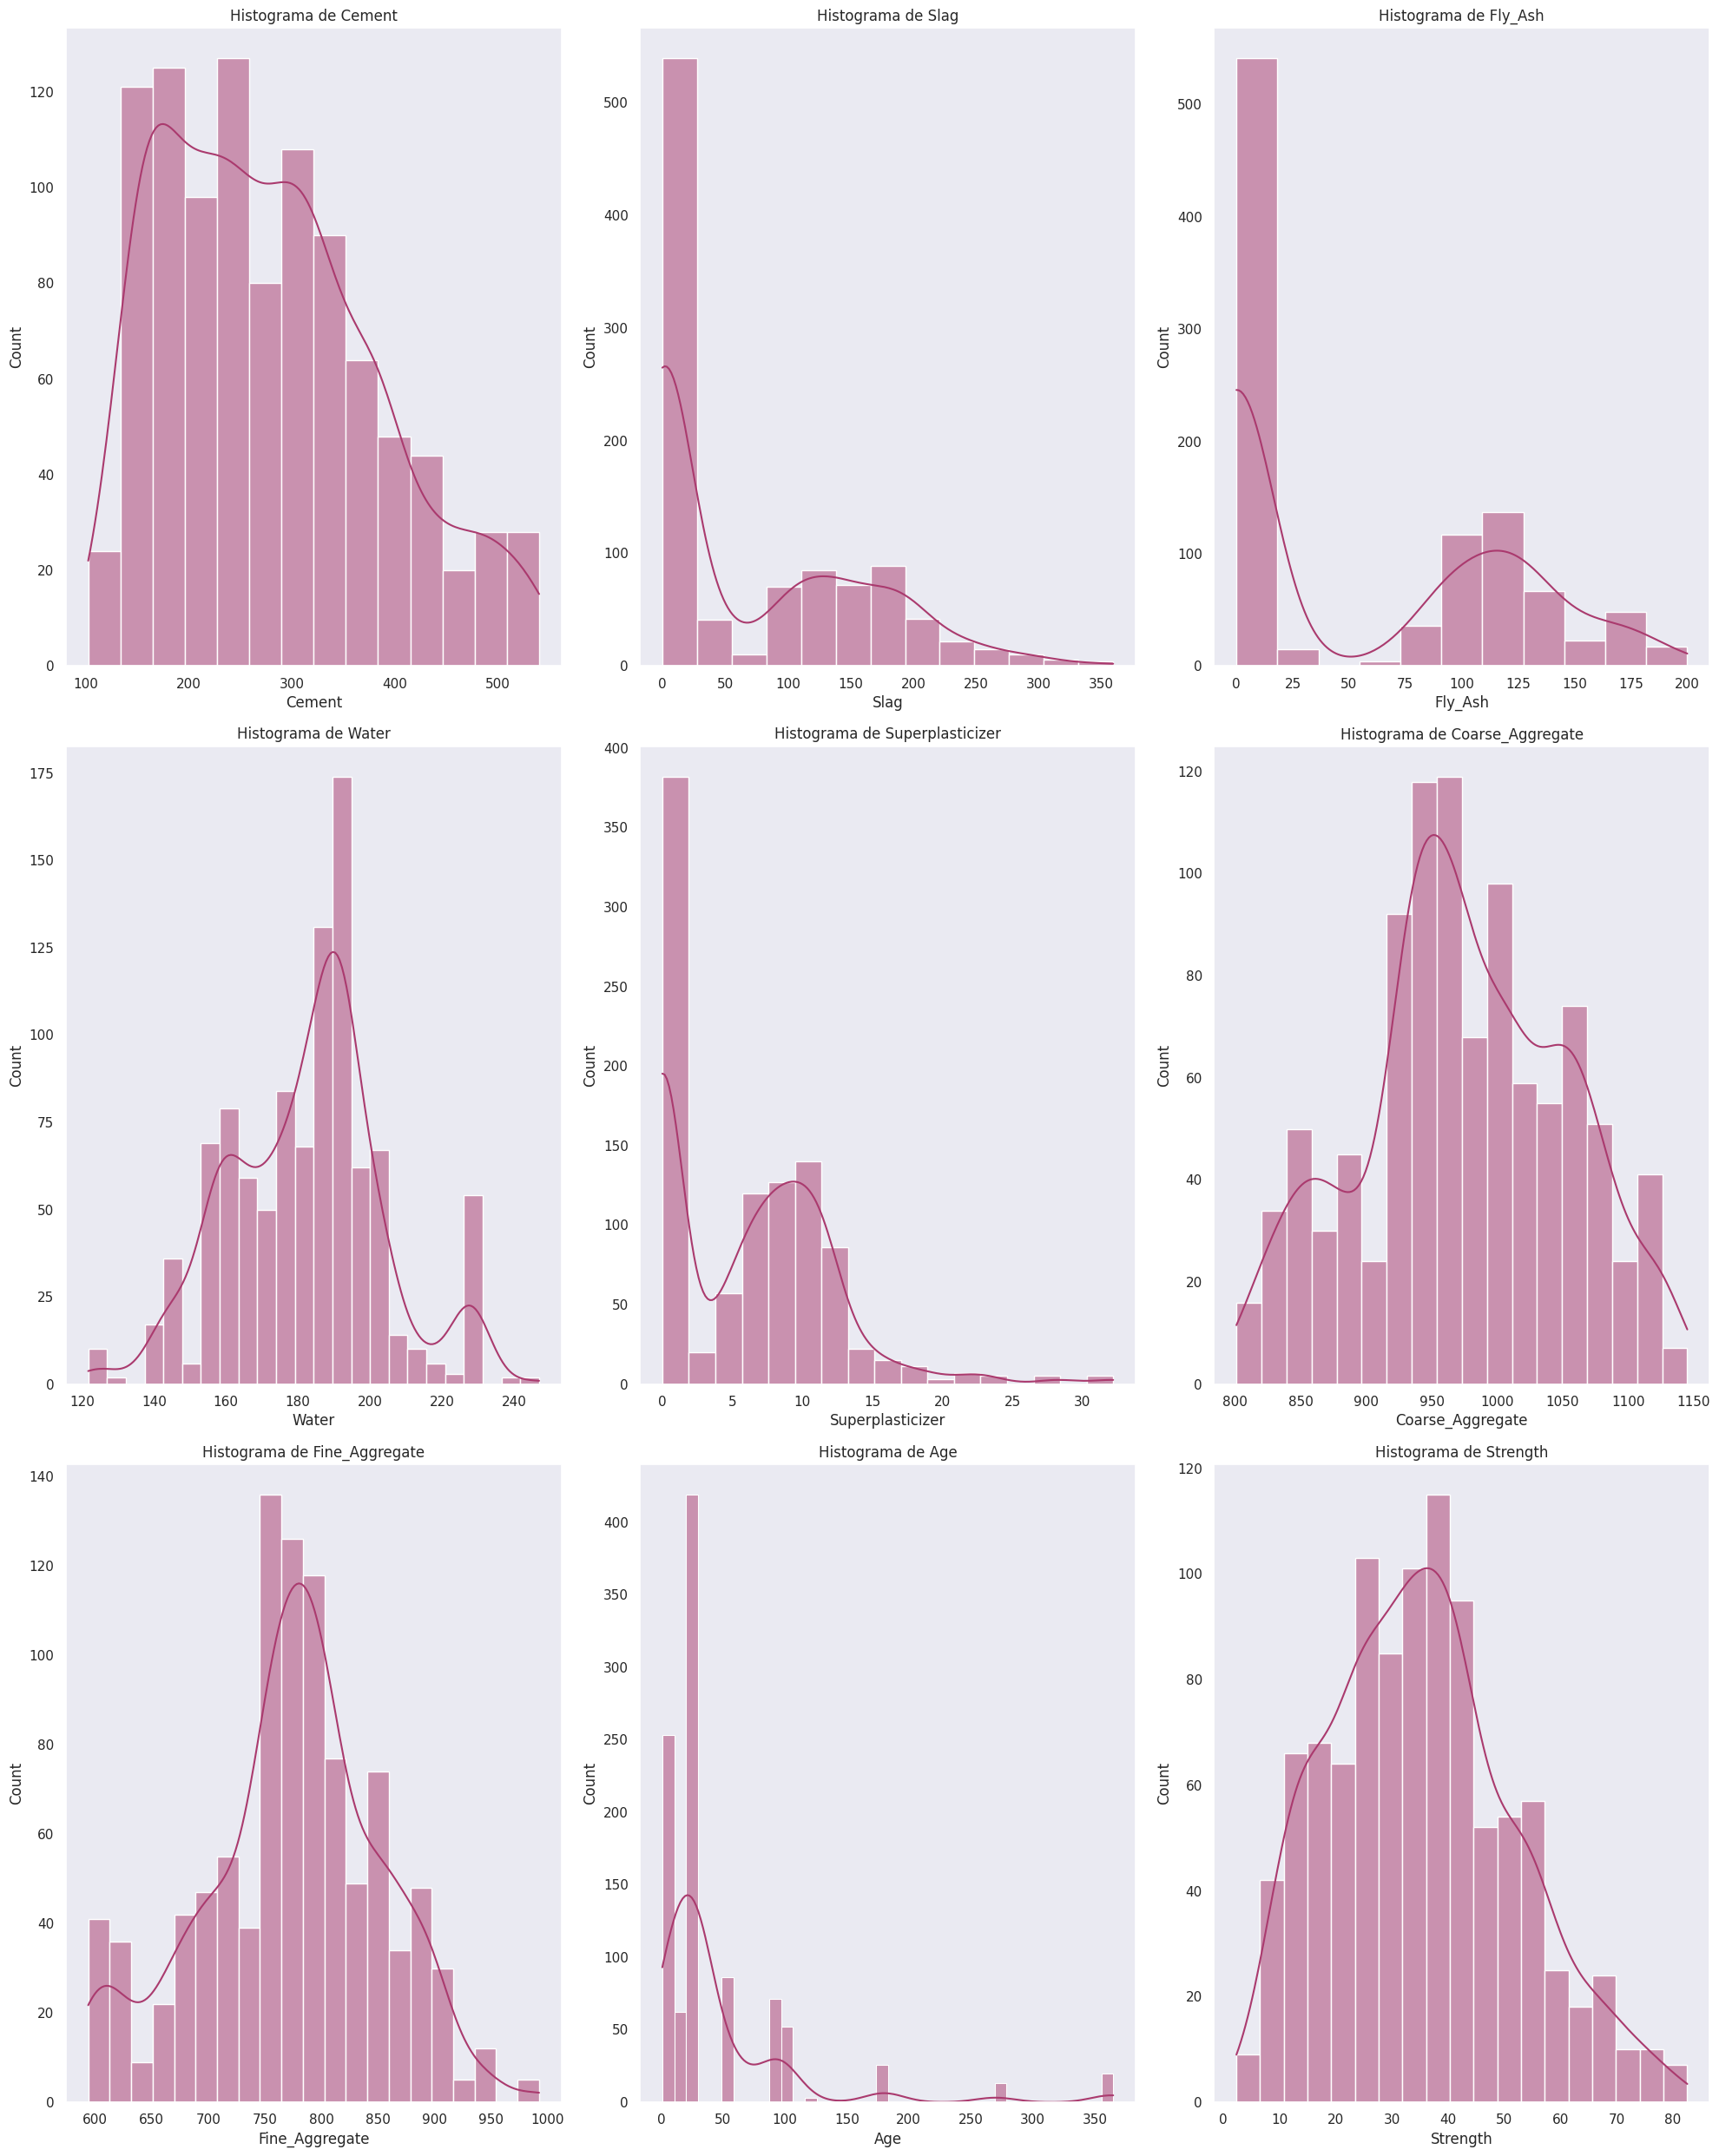

In [23]:
# Crear la figura y los ejes
num_columns = 3
num_rows = (len(df.columns) + num_columns - 1) // num_columns
fig, ax = plt.subplots(num_rows, num_columns, figsize=(20, 25))

sns.set_theme(style="darkgrid")

# Definir colores
hist_palette = sns.color_palette("flare", as_cmap=True)
bar_palette = sns.color_palette("pastel")

# Crear histogramas para cada variable seleccionada usando Seaborn
for i, column in enumerate(df.columns):
    row = i // num_columns
    col_pos = i % num_columns
    sns.histplot(df[column], kde=True, ax=ax[row, col_pos], color=hist_palette(0.6))
    ax[row, col_pos].set_title(f"Histograma de {column}")

plt.tight_layout()
plt.show()

### Análisis de los Resultados - Histogramas

#### Cement
- **Distribución:** Ligeramente sesgada a la derecha.
- **Observaciones:** La mayoría de las observaciones se encuentran entre 150 y 300 kg/m³.

#### Slag
- **Distribución:** Muy sesgada a la derecha.
- **Observaciones:** Un gran número de valores cercanos a 0, con pocos valores elevados.

#### Fly_Ash
- **Distribución:** Altamente sesgada a la derecha.
- **Observaciones:** La mayoría de los datos están concentrados alrededor de 0, con una disminución rápida a medida que aumenta el valor.

#### Water
- **Distribución:** Multimodal, con varios picos en diferentes puntos.
- **Observaciones:** Varias concentraciones alrededor de 160 kg/m³, 180 kg/m³ y 200 kg/m³.

#### Superplasticizer
- **Distribución:** Sesgada a la derecha, con un gran número de valores cercanos a 0.
- **Observaciones:** Pocos valores elevados, indicando una utilización limitada del superplastificante en grandes cantidades.

#### Coarse_Aggregate
- **Distribución:** Cerca de una distribución normal, con un ligero sesgo hacia la derecha.
- **Observaciones:** La mayoría de los datos están concentrados entre 800 y 1000 kg/m³.

#### Fine_Aggregate
- **Distribución:** Similar a la del árido grueso, pero con más variabilidad.
- **Observaciones:** Concentración principal entre 600 y 900 kg/m³.

#### Age
- **Distribución:** Muy sesgada a la derecha.
- **Observaciones:** Gran número de observaciones cercanas a 0, con un descenso significativo a medida que aumenta la edad.

#### Strength
- **Distribución:** Aproximadamente normal, con un ligero sesgo hacia la derecha.
- **Observaciones:** La mayoría de las muestras tienen una resistencia entre 20 y 50 MPa.

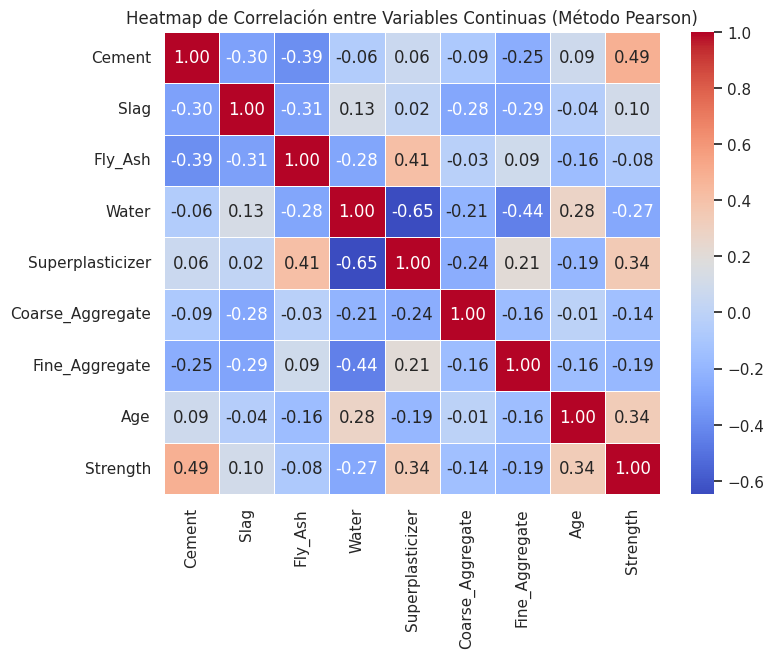

In [24]:
# Calcular la matriz de correlación usando el método de Pearson
correlation_matrix = df.corr(method="pearson")

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables Continuas (Método Pearson)")
plt.show()

### Análisis del Heatmap de Correlación

#### Relación con Strength

#### Cement
- **Correlación:** 0.49
- **Interpretación:** Existe una correlación positiva moderada entre el cemento y la resistencia del concreto. Esto indica que, en general, a medida que aumenta la cantidad de cemento, también aumenta la resistencia.

#### Slag
- **Correlación:** 0.10
- **Interpretación:** Correlación positiva muy débil, lo que sugiere que la cantidad de escoria tiene un impacto mínimo en la resistencia.

#### Fly_Ash
- **Correlación:** -0.08
- **Interpretación:** Correlación negativa muy débil, indicando que el uso de cenizas volantes tiene poco o ningún efecto en la resistencia.

#### Water
- **Correlación:** -0.27
- **Interpretación:** Correlación negativa débil. A medida que aumenta la cantidad de agua, la resistencia tiende a disminuir, lo que es consistente con la teoría de que un exceso de agua puede debilitar la mezcla de concreto.

#### Superplasticizer
- **Correlación:** 0.34
- **Interpretación:** Correlación positiva moderada. Sugiere que el uso de superplastificantes puede ayudar a mejorar la resistencia del concreto.

#### Coarse_Aggregate
- **Correlación:** -0.14
- **Interpretación:** Correlación negativa débil. La cantidad de árido grueso parece tener un impacto menor y negativo en la resistencia.

#### Fine_Aggregate
- **Correlación:** -0.19
- **Interpretación:** Correlación negativa débil. Similar al árido grueso, el árido fino muestra una relación débil y negativa con la resistencia.

#### Age
- **Correlación:** 0.34
- **Interpretación:** Correlación positiva moderada. A medida que el concreto envejece, su resistencia tiende a aumentar, lo cual es esperado en la mayoría de los casos.

### Conclusiones

1. **Variables clave para el modelo de regresión:** Las variables **Cement**, **Superplasticizer**, y **Age** tienen correlaciones positivas más fuertes con **Strength** y deben considerarse como predictores importantes.

2. **Variables con baja correlación:** **Slag**, **Fly_Ash**, **Coarse_Aggregate**, y **Fine_Aggregate** tienen correlaciones muy débiles con **Strength**, indicando que pueden tener un impacto limitado en la predicción de la resistencia.

3. **Consideraciones adicionales:** La correlación negativa con **Water** sugiere que es crucial manejar adecuadamente la cantidad de agua en la mezcla para evitar una disminución de la resistencia.

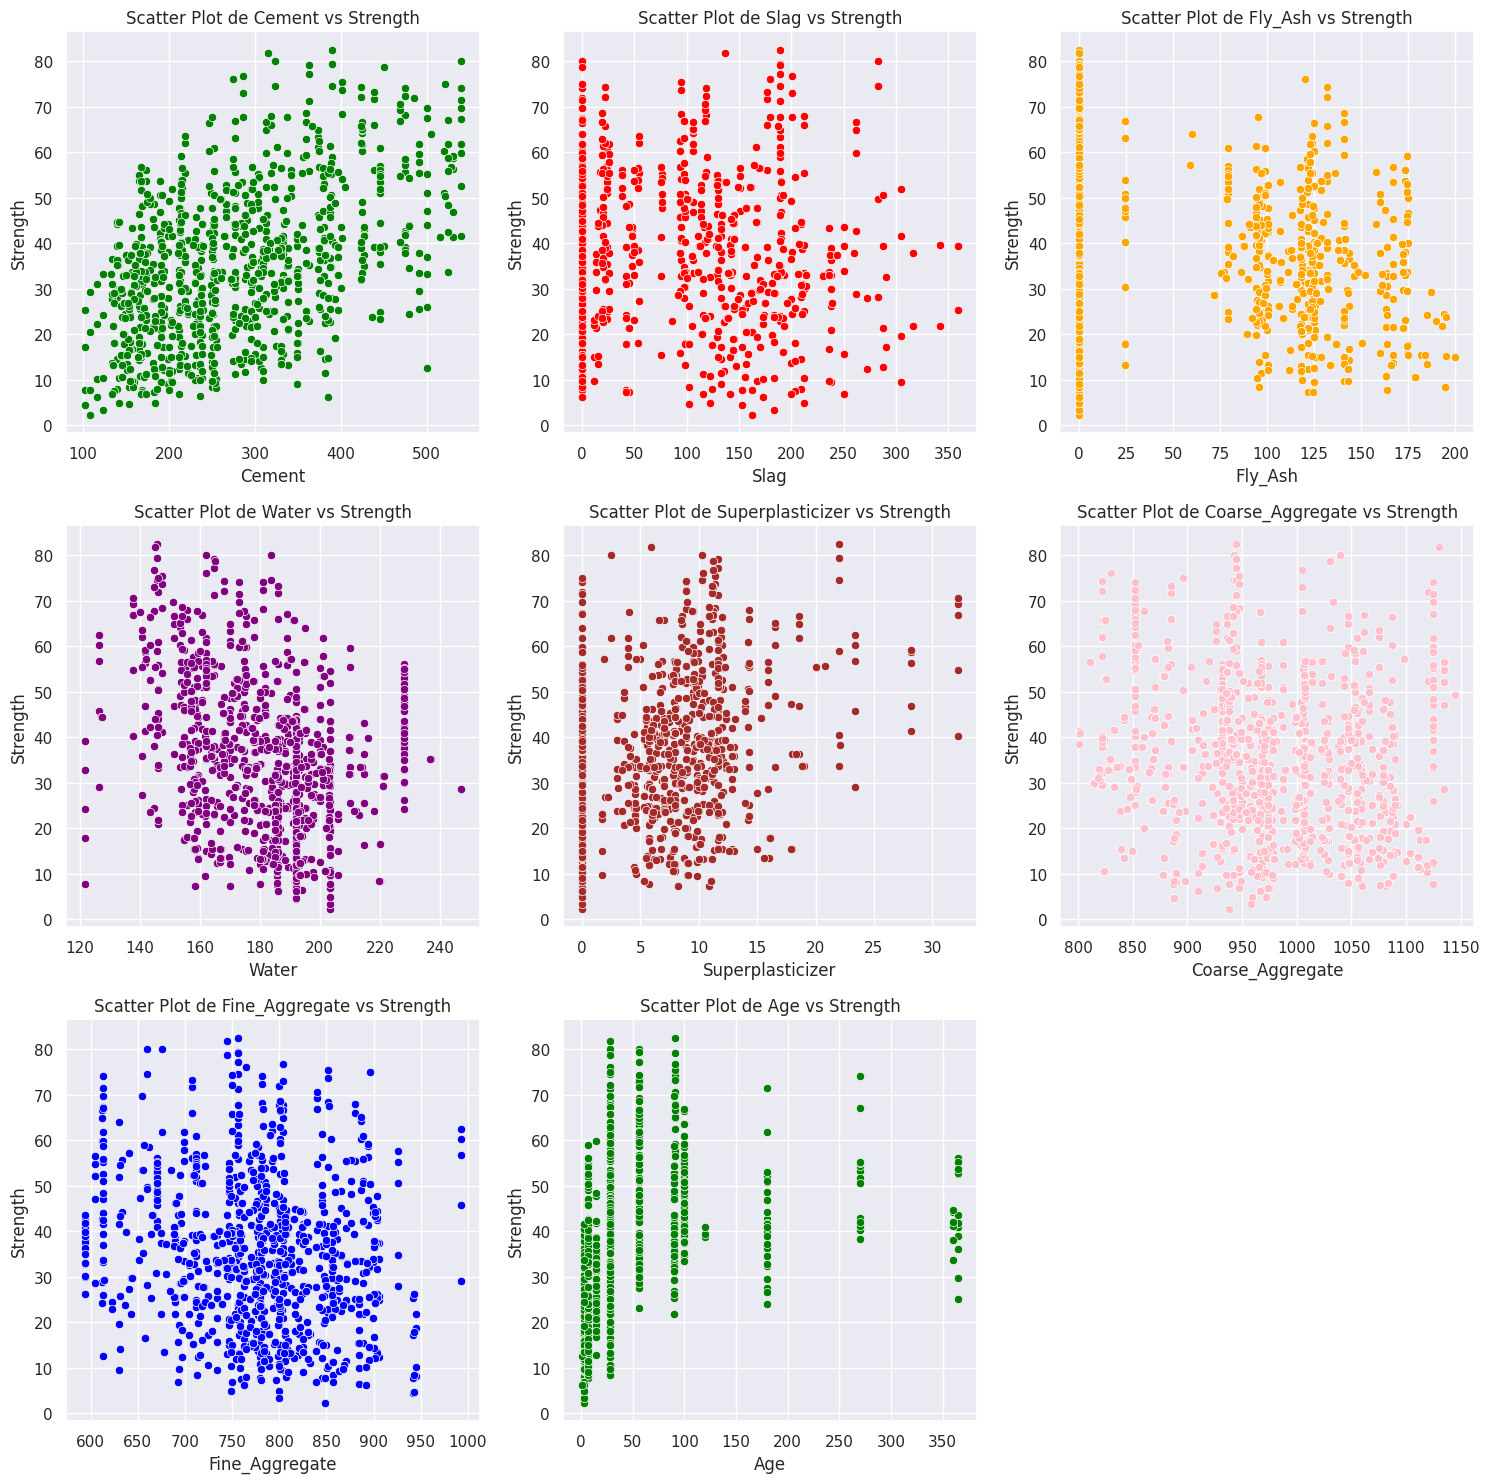

In [25]:
# Lista de variables a graficar contra Strength
variables = [col for col in df.columns if col != "Strength"]

# Crear scatterplots de 3 en 3 para cada variable contra Strength
plt.figure(figsize=(15, 15))
colors = ["blue", "green", "red", "orange", "purple", "brown", "pink"]

for i, column in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=column, y="Strength", color=colors[i % len(colors)])
    plt.title(f"Scatter Plot de {column} vs Strength")
    plt.xlabel(column)
    plt.ylabel("Strength")

plt.tight_layout()
plt.show()

### Conclusión

Las variables **Cement**, **Superplasticizer**, **Age**, y **Water** son las más importantes para predecir la resistencia del concreto. Estas variables deben ser el enfoque principal al construir un modelo de regresión para estimar **Strength**. Las otras variables pueden ser consideradas adicionales, pero es probable que tengan un impacto menor en la precisión del modelo.

### Detalle de Variables Clave

#### Cement
- **Correlación:** 0.49
- **Importancia:** Alta. La cantidad de cemento tiene una correlación positiva moderada con la resistencia, lo que indica que es un predictor significativo.

#### Superplasticizer
- **Correlación:** 0.34
- **Importancia:** Moderada. El uso de superplastificantes está asociado con un aumento en la resistencia, lo que sugiere que es una variable importante a considerar.

#### Age
- **Correlación:** 0.34
- **Importancia:** Moderada. La edad del concreto es un factor clave en el desarrollo de la resistencia con el tiempo.

#### Water
- **Correlación:** -0.27
- **Importancia:** Moderada. Aunque la correlación es negativa, es importante debido a su impacto inverso en la resistencia.

## Actividad 2

In [26]:
# Separar características y variable objetivo
X = df.drop("Strength", axis=1)
y = df["Strength"]

In [27]:
# Dividir los datos en 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

Train: (703, 8)
Test: (302, 8)


Para predecir la resistencia a la compresión del concreto utilizamos tres modelos de regresión `DecisionTreeRegressor`, `LinearRegression` y `SVR` (Support Vector Regression).

- `DecisionTreeRegressor` captura relaciones no lineales y es fácil de interpretar.  
- `LinearRegression` ofrece una línea base simple y eficiente, ideal para relaciones aproximadamente lineales.  
- `SVR` maneja relaciones no lineales complejas mediante kernels, proporcionando flexibilidad.  

**Aplicabilidad**:  
- Estos modelos se utilizan porque la predicción de Strength es una tarea de regresión, donde el objetivo es estimar un valor numérico continuo.


### Modelo 1 - DecisionTreeRegressor

In [28]:
# Entrenar el modelo de árbol de regresión con profundidad máxima = 4
tree_regressor = DecisionTreeRegressor(max_depth=4)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

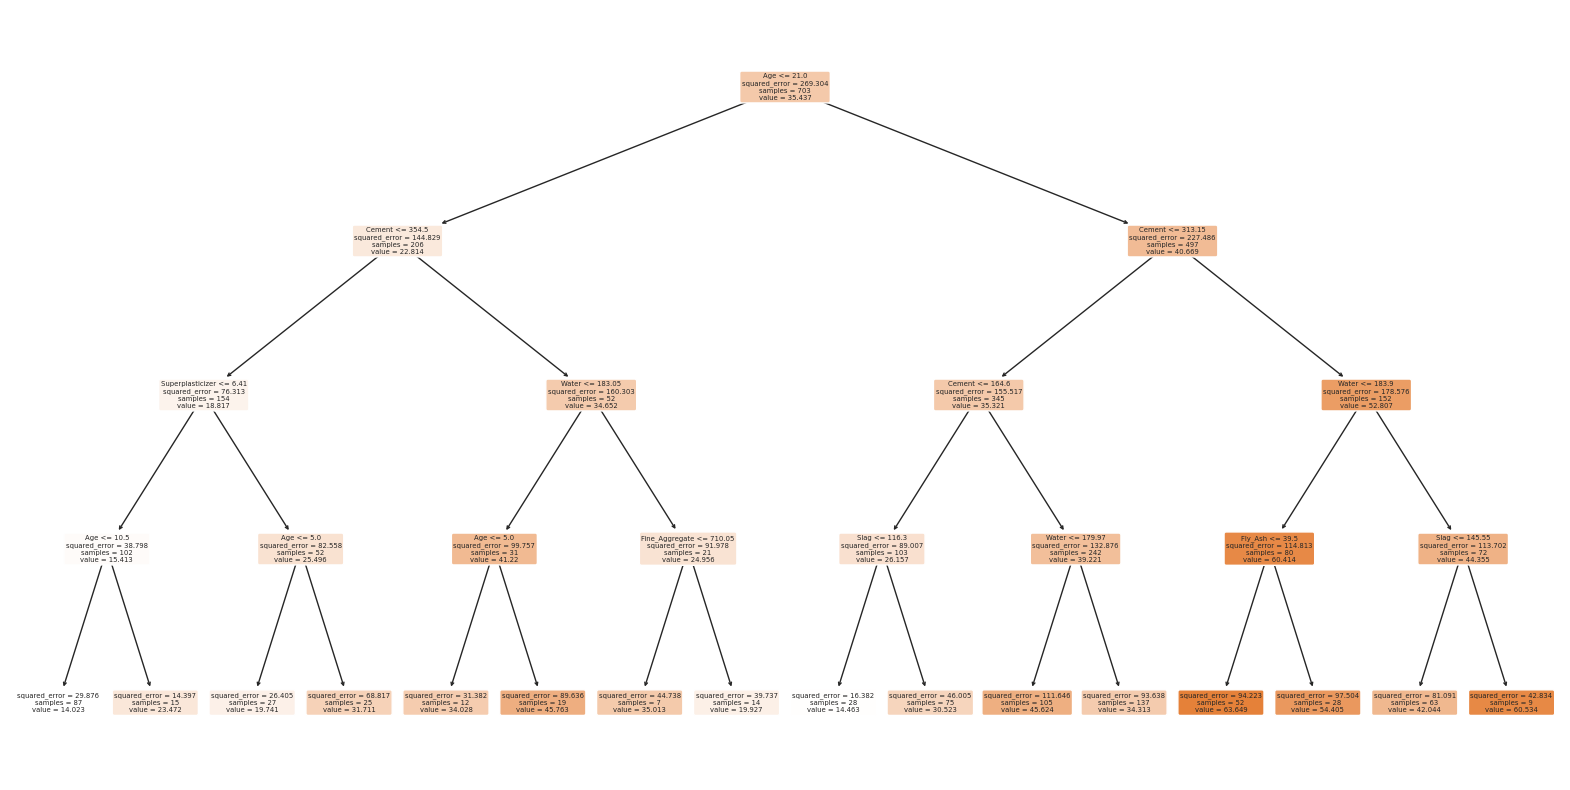

In [29]:
# Dibujar el diagrama del árbol
plt.figure(figsize=(20, 10))
plot_tree(tree_regressor, feature_names=X.columns.tolist(), filled=True, rounded=True)
plt.show()

### Modelo 2 - LinearRegression

In [30]:
# Entrenar el modelo de regresión lineal
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
beta0 = linear_regressor.intercept_
coefs = linear_regressor.coef_

print(f"Intercepto: {beta0}")
print(f"Coeficientes: {coefs}")

Intercepto: -6.373840888077076
Coeficientes: [ 0.11945336  0.09962408  0.08936373 -0.18204079  0.21375546  0.01007405
  0.01728526  0.11572408]


In [32]:
# Mostrar los coeficientes del modelo
coef_df = pd.DataFrame(linear_regressor.coef_, X.columns, columns=["Coefficient"])
print("\nCoeficientes del modelo:")
coef_df


Coeficientes del modelo:


,Coefficient
Cement,0.119453
Slag,0.099624
Fly_Ash,0.089364
Water,-0.182041
Superplasticizer,0.213755
Coarse_Aggregate,0.010074
Fine_Aggregate,0.017285
Age,0.115724


In [33]:
# Residuos en el conjunto de entrenamiento
y_train_pred_lr = linear_regressor.predict(X_train)

# Calcular los residuos
residuals = y_train - y_train_pred_lr

print(f"Residuo: {residuals}")

Residuo: 547      0.197071
265      2.143270
934     -4.035571
348      5.704609
513    -11.355758
          ...    
1014    -4.335546
110    -10.718494
681      5.797417
497     -7.011341
979     13.395236
Name: Strength, Length: 703, dtype: float64


In [34]:
# Calcular y mostrar la media y desviación estándar de los residuos
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)
print(f"Media de los residuos: {mean_residuals}")
print(f"Desviación estándar de los residuos: {std_residuals}")

Media de los residuos: 1.5767377920138781e-15
Desviación estándar de los residuos: 10.028574853903478


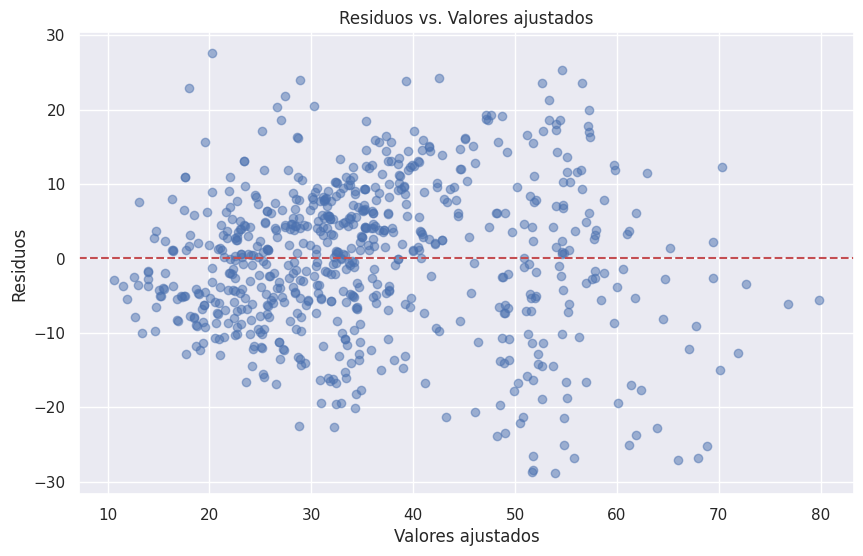

In [35]:
# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred_lr, residuals, alpha=0.5)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Residuos vs. Valores ajustados")
plt.show()

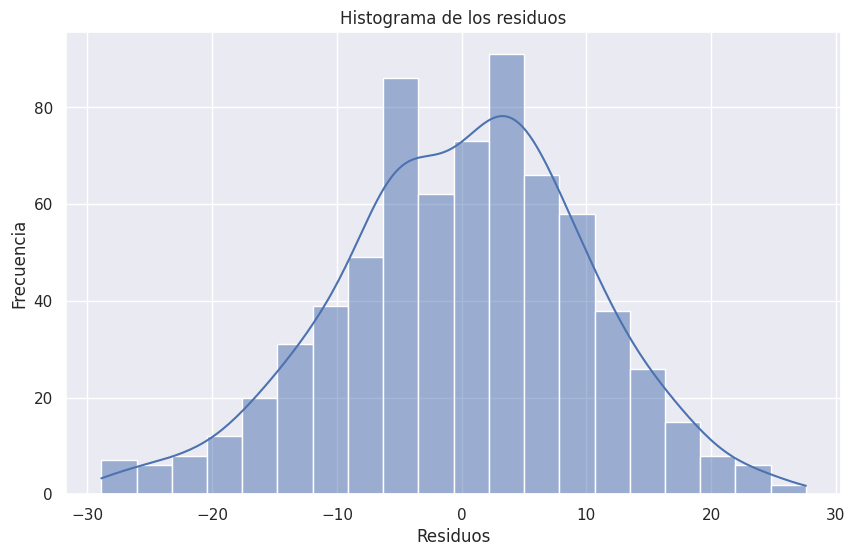

In [36]:
# Histograma de los residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de los residuos")
plt.show()

### Modelo 3 - SVR (Support Vector Regression)

In [37]:
# Entrenar el modelo de SVR
svr_regressor = SVR(kernel="rbf")
svr_regressor.fit(X_train, y_train)

SVR()

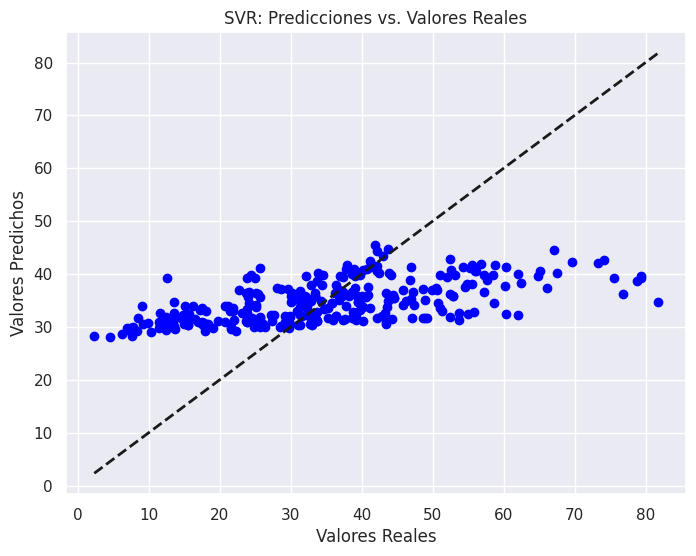

In [38]:
y_pred_test_svr = svr_regressor.predict(X_test)

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_svr, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "k--", lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("SVR: Predicciones vs. Valores Reales")
plt.show()

## Actividad 3

### Modelo 1 - DecisionTreeRegressor

In [39]:
# Realizar predicciones
y_pred_test_tree = tree_regressor.predict(X_test)

# mean_squared_error
mse_tree = mean_squared_error(y_test, y_pred_test_tree)
rmse_tree = np.sqrt(mse_tree)
# mean_absolute_error
mae_tree = mean_absolute_error(y_test, y_pred_test_tree)
# r2_score
r2_tree = r2_score(y_test, y_pred_test_tree)

# Mostrar resultados
print("####################")
print("Árboles de Regresión")
print("####################")
print("\n")
print("Conjunto de prueba")
print("------------------")
print(f"(MSE) del conjunto de prueba: {np.round(mse_tree, 2)}")
print(f"(RMSE) del conjunto de prueba: {np.round(rmse_tree, 2)}")
print(f"(MAE) del conjunto de prueba: {np.round(mae_tree, 2)}")
print(f"(R2) del conjunto de prueba: {np.round(r2_tree, 2)}")

####################
Árboles de Regresión
####################


Conjunto de prueba
------------------
(MSE) del conjunto de prueba: 82.05
(RMSE) del conjunto de prueba: 9.06
(MAE) del conjunto de prueba: 7.07
(R2) del conjunto de prueba: 0.68


### Modelo 2 - LinearRegression

In [40]:
# Realizar predicciones
y_pred_test_lr = linear_regressor.predict(X_test)

# mean_squared_error
mse_lr = mean_squared_error(y_test, y_pred_test_lr)
rmse_lr = np.sqrt(mse_lr)
# mean_absolute_error
mae_lr = mean_absolute_error(y_test, y_pred_test_lr)
# r2_score
r2_lr = r2_score(y_test, y_pred_test_lr)

# Mostrar resultados
print("################")
print("Regresión Lineal")
print("################")
print("\n")
print("Conjunto de prueba")
print("------------------")
print(f"(MSE) del conjunto de prueba: {np.round(mse_lr, 2)}")
print(f"(RMSE) del conjunto de prueba: {np.round(rmse_lr, 2)}")
print(f"(MAE) del conjunto de prueba: {np.round(mae_lr, 2)}")
print(f"(R2) del conjunto de prueba: {np.round(r2_lr, 2)}")
print("\n")

################
Regresión Lineal
################


Conjunto de prueba
------------------
(MSE) del conjunto de prueba: 116.72
(RMSE) del conjunto de prueba: 10.8
(MAE) del conjunto de prueba: 8.34
(R2) del conjunto de prueba: 0.54




### Modelo 3 - SVR (Support Vector Regression)

In [41]:
# Realizar predicciones
y_pred_test_svr = svr_regressor.predict(X_test)

# mean_squared_error
mse_svr = mean_squared_error(y_test, y_pred_test_svr)
rmse_svr = np.sqrt(mse_svr)
# mean_absolute_error
mae_svr = mean_absolute_error(y_test, y_pred_test_svr)
# r2_score
r2_svr = r2_score(y_test, y_pred_test_svr)

# Mostrar resultados
print("###############################")
print("SVR (Support Vector Regression)")
print("###############################")
print("\n")
print("Conjunto de prueba")
print("------------------")
print(f"(MSE) del conjunto de prueba: {np.round(mse_svr, 2)}")
print(f"(RMSE) del conjunto de prueba: {np.round(rmse_svr, 2)}")
print(f"(MAE) del conjunto de prueba: {np.round(mae_svr, 2)}")
print(f"(R2) del conjunto de prueba: {np.round(r2_svr, 2)}")
print("\n")

###############################
SVR (Support Vector Regression)
###############################


Conjunto de prueba
------------------
(MSE) del conjunto de prueba: 193.63
(RMSE) del conjunto de prueba: 13.92
(MAE) del conjunto de prueba: 10.87
(R2) del conjunto de prueba: 0.24




In [42]:
# Datos para las métricas calculadas
data = {
    "Model": [
        "Decision Tree",
        "Decision Tree",
        "Decision Tree",
        "Decision Tree",
        "Linear Regression",
        "Linear Regression",
        "Linear Regression",
        "Linear Regression",
        "SVR",
        "SVR",
        "SVR",
        "SVR",
    ],
    "Metric": [
        "MSE",
        "RMSE",
        "MAE",
        "R2",
        "MSE",
        "RMSE",
        "MAE",
        "R2",
        "MSE",
        "RMSE",
        "MAE",
        "R2",
    ],
    "Value": [
        mse_tree,
        rmse_tree,
        mae_tree,
        r2_tree,
        mse_lr,
        rmse_lr,
        mae_lr,
        r2_lr,
        mse_svr,
        rmse_svr,
        mae_svr,
        r2_svr,
    ],
}

# Convertir a DataFrame
df_metrics = pd.DataFrame(data)

df_metrics

,Model,Metric,Value
0,Decision Tree,MSE,82.047830
1,Decision Tree,RMSE,9.058026
2,Decision Tree,MAE,7.073967
3,Decision Tree,R2,0.677589
4,Linear Regression,MSE,116.717522
5,Linear Regression,RMSE,10.803588
6,Linear Regression,MAE,8.339199
7,Linear Regression,R2,0.541352
8,SVR,MSE,193.627579
9,SVR,RMSE,13.915013


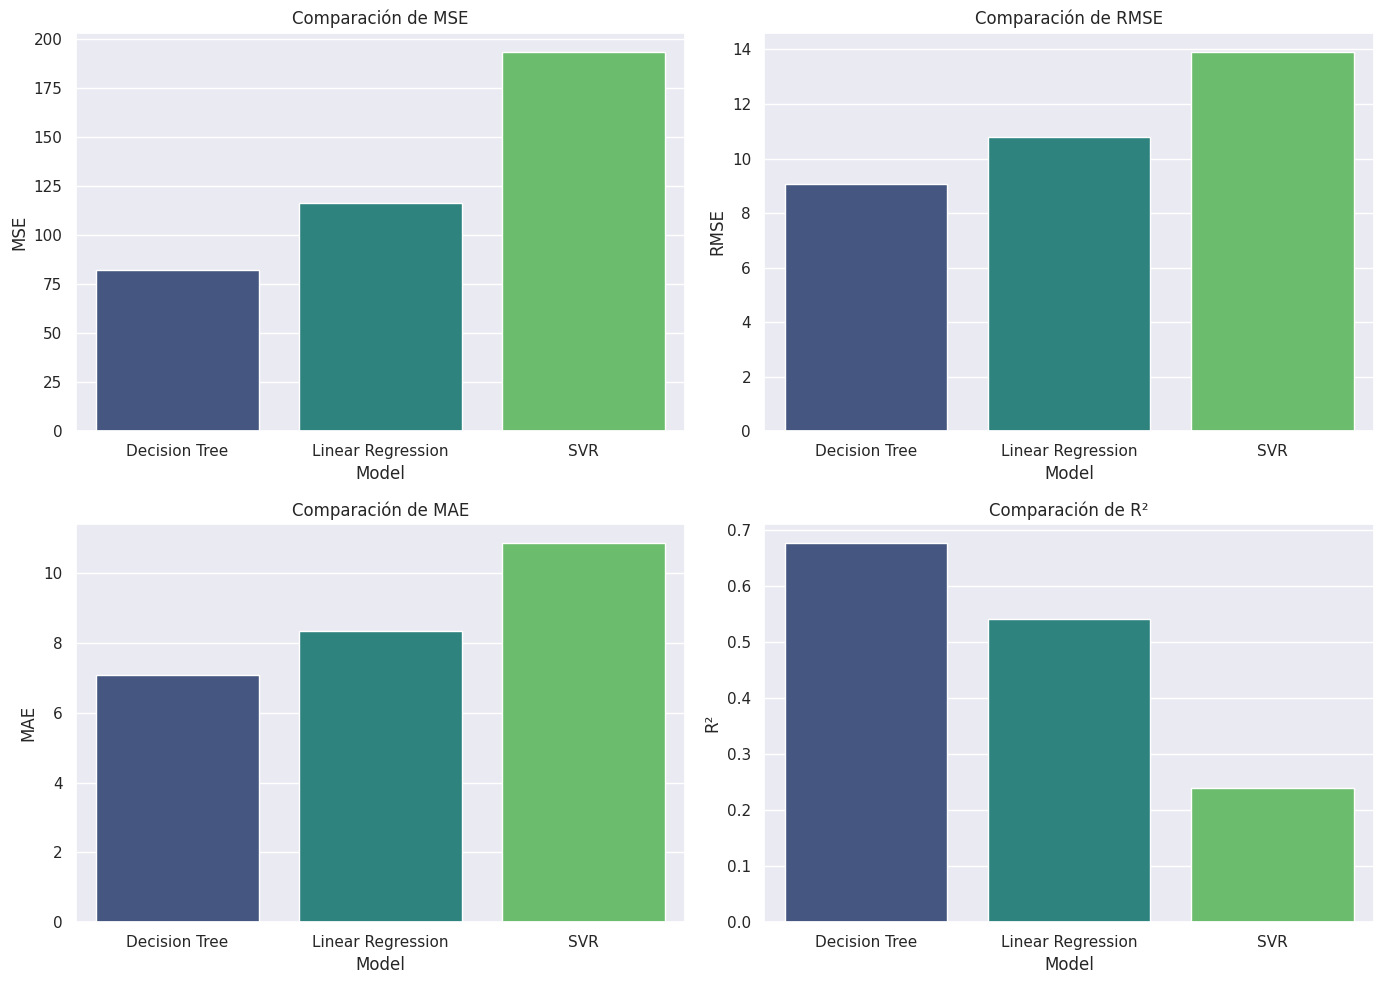

In [43]:
# Crear la figura y los subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Crear los gráficos de barras para cada métrica
# MSE
sns.barplot(
    x="Model",
    y="Value",
    data=df_metrics[df_metrics["Metric"] == "MSE"],
    ax=axs[0, 0],
    palette="viridis",
    hue="Model",
)
axs[0, 0].set_title("Comparación de MSE")
axs[0, 0].set_ylabel("MSE")

# RMSE
sns.barplot(
    x="Model",
    y="Value",
    data=df_metrics[df_metrics["Metric"] == "RMSE"],
    ax=axs[0, 1],
    palette="viridis",
    hue="Model",
)
axs[0, 1].set_title("Comparación de RMSE")
axs[0, 1].set_ylabel("RMSE")

# MAE
sns.barplot(
    x="Model",
    y="Value",
    data=df_metrics[df_metrics["Metric"] == "MAE"],
    ax=axs[1, 0],
    palette="viridis",
    hue="Model",
)
axs[1, 0].set_title("Comparación de MAE")
axs[1, 0].set_ylabel("MAE")

# R²
sns.barplot(
    x="Model",
    y="Value",
    data=df_metrics[df_metrics["Metric"] == "R2"],
    ax=axs[1, 1],
    palette="viridis",
    hue="Model",
)
axs[1, 1].set_title("Comparación de R²")
axs[1, 1].set_ylabel("R²")

# Ajustar el layout
plt.tight_layout()
plt.show()

### Análisis de Resultados

### MSE (Error Cuadrático Medio)
- **Decision Tree** tiene el menor MSE (82.05), lo que indica una menor media de los errores al cuadrado.
- **Linear Regression** tiene un MSE más alto (116.72), sugiriendo errores más grandes en promedio comparado con Decision Tree.
- **SVR** presenta el MSE más alto (193.63), lo que indica los errores más grandes en promedio entre los tres modelos.

### RMSE (Raíz del Error Cuadrático Medio)
- **Decision Tree** tiene el menor RMSE (9.06), sugiriendo que sus errores de predicción promedio son menores.
- **Linear Regression** tiene un RMSE más alto (10.80), lo que indica mayores errores promedio comparado con Decision Tree.
- **SVR** tiene el RMSE más alto (13.92), confirmando mayores errores de predicción.

### MAE (Error Absoluto Medio)
- **Decision Tree** muestra el menor MAE (7.07), indicando las predicciones más precisas entre los modelos.
- **Linear Regression** tiene un MAE de (8.34), siendo menos preciso que Decision Tree.
- **SVR** nuevamente tiene el mayor MAE (10.87), indicando las predicciones menos precisas.

### R² (Coeficiente de Determinación)
- **Decision Tree** tiene el valor de R² más alto (0.68), lo que significa que explica mejor la variabilidad en los datos.
- **Linear Regression** tiene un R² de (0.54), indicando una capacidad explicativa menor comparada con Decision Tree.
- **SVR** tiene el valor más bajo de R² (0.24), indicando una menor capacidad explicativa.

### Conclusión
**Decision Tree** es el modelo más efectivo, con el mejor equilibrio entre precisión y capacidad explicativa. **Linear Regression** tiene un rendimiento aceptable, pero menor que el de Decision Tree. **SVR**, aunque muestra el peor rendimiento en esta comparación, podría beneficiarse de una mejor optimización de hiperparámetros o técnicas adicionales de ajuste.

Las características más importantes en la predicción de la resistencia a la compresión del concreto suelen ser Cement, Water, Age, y Superplasticizer. Estas características influyen directamente en las propiedades físicas y químicas del concreto, afectando su resistencia final.

## Actividad 4

Seleccionamos los modelos `DecisionTreeRegressor` y `SVR` (Support Vector Regression) para los ajustes de hiperparámetros usando **Grid Search** y visualizar si mejoran el rendimiento que tuvimos anteriormente, sobre todo con SVR que tuvimos un mal rendimiento.


### DecisionTreeRegressor - Grid Search

In [44]:
# Grid de hiperparámetros para Decision Tree Regressor
param_grid_tree = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
}

In [45]:
# 1. Grid Search para Decision Tree Regressor
grid_tree_regressor = DecisionTreeRegressor()  # Inicialización del modelo
grid_search_tree = GridSearchCV(
    estimator=grid_tree_regressor,
    param_grid=param_grid_tree,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
)

# Ajuste del modelo utilizando validación cruzada con 5 folds
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [5, 10, 15, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [46]:
# Obtener el mejor modelo y sus hiperparámetros optimizados
best_tree = grid_search_tree.best_estimator_

In [47]:
# Obtener los mejores modelos y sus hiperparámetros optimizados
print("Mejores Hiperparámetros:", grid_search_tree.best_params_)

Mejores Hiperparámetros: {'criterion': 'squared_error', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [48]:
# Realizar predicciones
y_pred_test_best_tree = best_tree.predict(X_test)

# mean_squared_error
mse_best_tree = mean_squared_error(y_test, y_pred_test_best_tree)
rmse_best_tree = np.sqrt(mse_tree)
# mean_absolute_error
mae_best_tree = mean_absolute_error(y_test, y_pred_test_best_tree)
# r2_score
r2_best_tree = r2_score(y_test, y_pred_test_best_tree)

# Mostrar resultados
print("##########################")
print("Mejor Modelo Decision Tree")
print("##########################")
print("\n")
print("Mejores Hiperparámetros:", grid_search_tree.best_params_)
print(f"(MSE) del conjunto de prueba: {np.round(mse_best_tree, 2)}")
print(f"(RMSE) del conjunto de prueba: {np.round(rmse_best_tree, 2)}")
print(f"(MAE) del conjunto de prueba: {np.round(mae_best_tree, 2)}")
print(f"(R2) del conjunto de prueba: {np.round(r2_best_tree, 2)}")

##########################
Mejor Modelo Decision Tree
##########################


Mejores Hiperparámetros: {'criterion': 'squared_error', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}
(MSE) del conjunto de prueba: 54.74
(RMSE) del conjunto de prueba: 9.06
(MAE) del conjunto de prueba: 5.09
(R2) del conjunto de prueba: 0.78


### SVR (Support Vector Regression) - Grid Search

In [49]:
# Grid de hiperparámetros simplificado para SVR
param_grid_svr = {
    "C": [10, 100],
    "epsilon": [0.1, 0.5],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale"],
}

In [50]:
# 2. Grid Search para SVR
grid_svr = SVR()  # Inicialización del modelo
grid_search_svr = GridSearchCV(
    estimator=grid_svr,
    param_grid=param_grid_svr,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
)

# Ajuste del modelo utilizando validación cruzada con 5 folds
grid_search_svr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [10, 100], 'epsilon': [0.1, 0.5],
                         'gamma': ['scale'], 'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [51]:
# Obtener el mejor modelo y sus hiperparámetros optimizados
best_svr = grid_search_svr.best_estimator_

In [52]:
# Obtener los mejores modelos y sus hiperparámetros optimizados
print("Mejores Hiperparámetros:", grid_search_svr.best_params_)

Mejores Hiperparámetros: {'C': 100, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}


In [53]:
# Realizar predicciones
y_pred_test_best_svr = best_svr.predict(X_test)

# mean_squared_error
mse_best_svr = mean_squared_error(y_test, y_pred_test_best_svr)
rmse_best_svr = np.sqrt(mse_tree)
# mean_absolute_error
mae_best_svr = mean_absolute_error(y_test, y_pred_test_best_svr)
# r2_score
r2_best_svr = r2_score(y_test, y_pred_test_best_svr)

# Mostrar resultados
print("################")
print("Mejor Modelo SVR")
print("################")
print("\n")
print("Mejores Hiperparámetros:", grid_search_svr.best_params_)
print(f"(MSE) del conjunto de prueba: {np.round(mse_best_svr, 2)}")
print(f"(RMSE) del conjunto de prueba: {np.round(rmse_best_svr, 2)}")
print(f"(MAE) del conjunto de prueba: {np.round(mae_best_svr, 2)}")
print(f"(R2) del conjunto de prueba: {np.round(r2_best_svr, 2)}")

################
Mejor Modelo SVR
################


Mejores Hiperparámetros: {'C': 100, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}
(MSE) del conjunto de prueba: 85.91
(RMSE) del conjunto de prueba: 9.06
(MAE) del conjunto de prueba: 6.84
(R2) del conjunto de prueba: 0.66


### Comparamos los Originales con los generados por Grid Search

In [54]:
# Crear un DataFrame con los resultados
results = {
    "Modelo": [
        "Decision Tree",
        "Decision Tree",
        "SVR",
        "SVR",
    ],
    "Configuración": [
        "Original",
        "Grid Search",
        "Original",
        "Grid Search",
    ],
    "MSE": [
        mse_tree,
        mse_best_tree,
        mse_svr,
        mse_best_svr,
    ],
    "RMSE": [
        rmse_tree,
        rmse_best_tree,
        rmse_svr,
        rmse_best_svr,
    ],
    "MAE": [
        mae_tree,
        mae_best_tree,
        mae_svr,
        mae_best_svr,
    ],
    "R²": [r2_tree, r2_best_tree, r2_svr, r2_best_svr],
}

# Convertir a DataFrame
df_results = pd.DataFrame(results)

df_results

,Modelo,Configuración,MSE,RMSE,MAE,R²
0,Decision Tree,Original,82.047830,9.058026,7.073967,0.677589
1,Decision Tree,Grid Search,54.736066,9.058026,5.087702,0.784912
2,SVR,Original,193.627579,13.915013,10.871049,0.239130
3,SVR,Grid Search,85.913907,9.058026,6.839611,0.662397


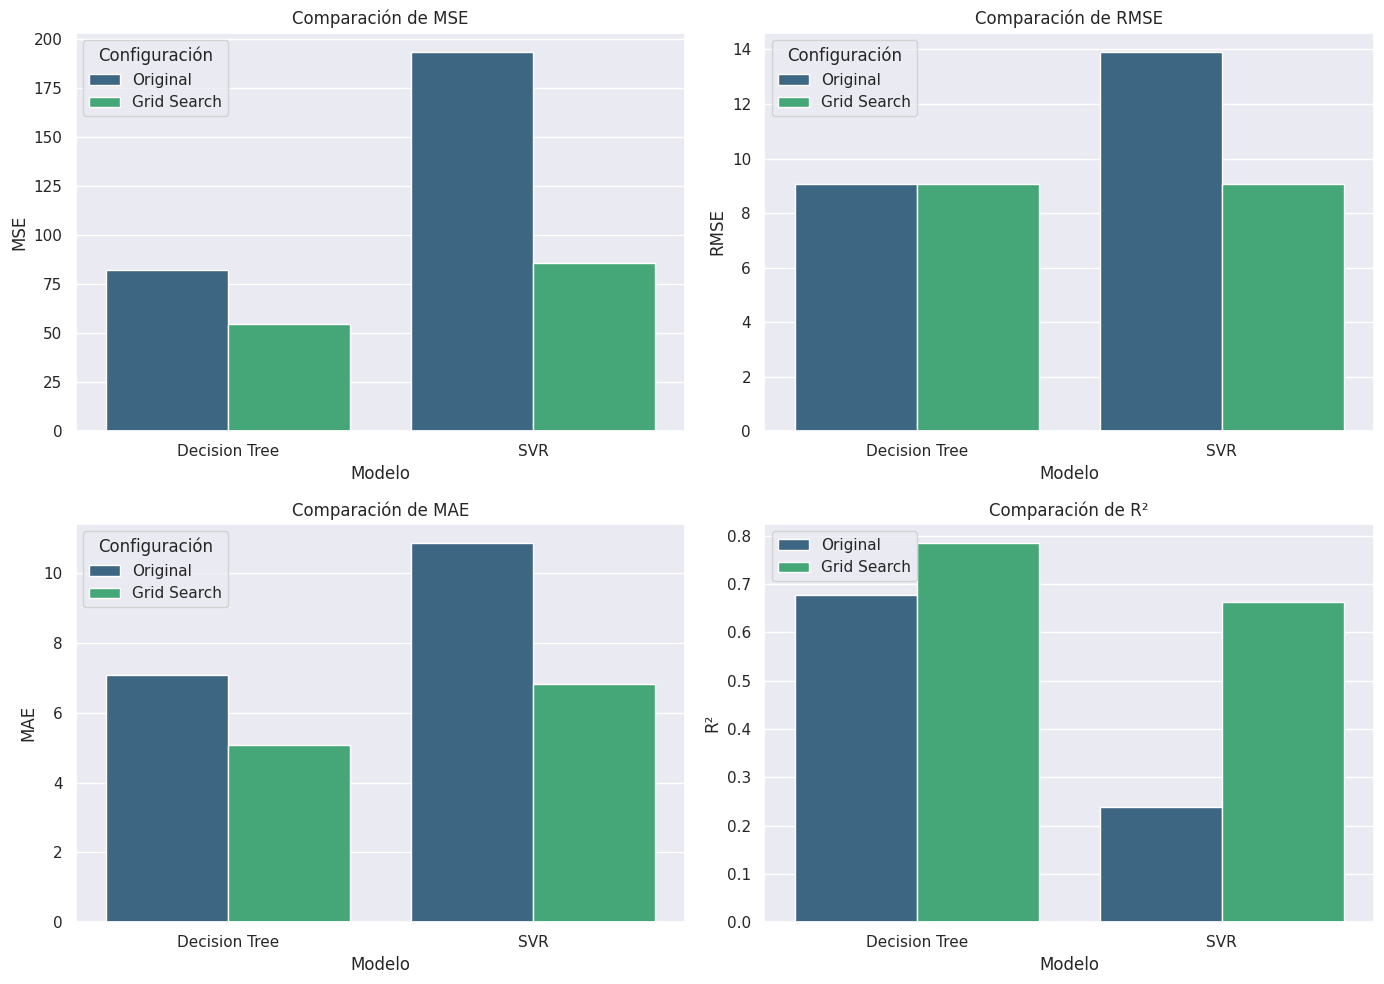

In [55]:
# Creación de gráficos de barras para cada métrica
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# MSE
sns.barplot(
    x="Modelo",
    y="MSE",
    hue="Configuración",
    data=df_results,
    ax=axs[0, 0],
    palette="viridis",
)
axs[0, 0].set_title("Comparación de MSE")
axs[0, 0].set_ylabel("MSE")

# RMSE
sns.barplot(
    x="Modelo",
    y="RMSE",
    hue="Configuración",
    data=df_results,
    ax=axs[0, 1],
    palette="viridis",
)
axs[0, 1].set_title("Comparación de RMSE")
axs[0, 1].set_ylabel("RMSE")

# MAE
sns.barplot(
    x="Modelo",
    y="MAE",
    hue="Configuración",
    data=df_results,
    ax=axs[1, 0],
    palette="viridis",
)
axs[1, 0].set_title("Comparación de MAE")
axs[1, 0].set_ylabel("MAE")

# R²
sns.barplot(
    x="Modelo",
    y="R²",
    hue="Configuración",
    data=df_results,
    ax=axs[1, 1],
    palette="viridis",
)
axs[1, 1].set_title("Comparación de R²")
axs[1, 1].set_ylabel("R²")

# Ajustar el layout
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()

## Análisis de Resultados Tras el Ajuste de Hiperparámetros con Grid Search

### Decision Tree Regressor

**Original:**
- MSE: 82.05
- RMSE: 9.06
- MAE: 7.07
- R²: 0.68

**Grid Search:**
- MSE: 54.74
- RMSE: 9.06
- MAE: 5.09
- R²: 0.78

**Interpretación:**  
El ajuste de hiperparámetros mediante Grid Search ha mejorado el rendimiento del modelo Decision Tree Regressor. Se observa una reducción en el MSE y MAE, lo que indica un aumento en la precisión de las predicciones. El R² también ha aumentado, pasando de 0.68 a 0.78, lo que muestra una mayor capacidad del modelo para explicar la variabilidad en los datos. La RMSE se mantuvo igual, indicando que la estabilidad del error promedio es consistente.

### SVR (Support Vector Regression)

**Original:**
- MSE: 193.63
- RMSE: 13.92
- MAE: 10.87
- R²: 0.24

**Grid Search:**
- MSE: 85.91
- RMSE: 9.06
- MAE: 6.84
- R²: 0.66

**Interpretación:**  
El ajuste de hiperparámetros ha producido una mejora significativa en el rendimiento del modelo SVR. La reducción del MSE, RMSE y MAE indica una notable mejora en la precisión de las predicciones. Además, el incremento en el R² de 0.24 a 0.66 refleja una mayor capacidad del modelo para capturar la relación entre las características y la variable objetivo.

## Conclusión General
El ajuste de hiperparámetros mediante Grid Search ha sido beneficioso para ambos modelos, especialmente para SVR, que ha pasado de un rendimiento inicial muy bajo a un modelo mucho más preciso y explicativo. Decision Tree Regressor también mostró mejoras notables, con reducciones en los errores y un aumento en el coeficiente de determinación. Estos resultados subrayan la importancia de la optimización de hiperparámetros para mejorar el rendimiento y la capacidad predictiva de los modelos de machine learning.


## Actividad 5

### Mejoras a los dos modelos seleccionados

### Aumentar el Conjunto de Datos
Incrementar el tamaño del conjunto de datos puede mejorar la capacidad del modelo para aprender patrones y generalizar mejor.

### Validación Cruzada Más Completa
Usar más folds en la validación cruzada para obtener una mejor estimación del rendimiento del modelo.

### Ensambles de Modelos
Combinar diferentes tipos de modelos para aprovechar las fortalezas de cada uno.

### Ampliar la Búsqueda de Hiperparámetros
- **Rango de Valores**: Ampliar el rango de valores de los hiperparámetros puede permitir al modelo encontrar configuraciones más óptimas. Por ejemplo, para SVR, probar con una gama más amplia de valores de C, epsilon, y gamma.
- **Combinaciones de Hiperparámetros**: Incluir combinaciones adicionales, como diferentes kernels para SVR o varios criterios de división para árboles de decisión.

### Conclusión
Mejorar los hiperparámetros y abordar el overfitting y underfitting son pasos fundamentales para desarrollar modelos de machine learning más precisos. Un enfoque equilibrado que incluya una buena selección de hiperparámetros, técnicas de regularización, y evaluación continua del rendimiento del modelo ayudará a crear modelos robustos que funcionen bien en datos no vistos.
